In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preparing Data

In [19]:
df = pd.read_csv("MalwareData.csv", sep='|', low_memory=True)
print("Shape:" , df.shape)
df.tail()

Shape: (138047, 57)


,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0
138046,VirusShare_d7648eae45f09b3adb75127f43be6d11,d7648eae45f09b3adb75127f43be6d11,332,224,258,11,0,111616,468480,0,...,4,4.407252,1.980482,6.115374,96625.000000,20,318464,72,0,0


In [20]:
legit = df[0:41323].drop(["legitimate"], axis = 1)
mal = df[41323::].drop(["legitimate"], axis = 1)
legit.shape, mal.shape

((41323, 56), (96724, 56))

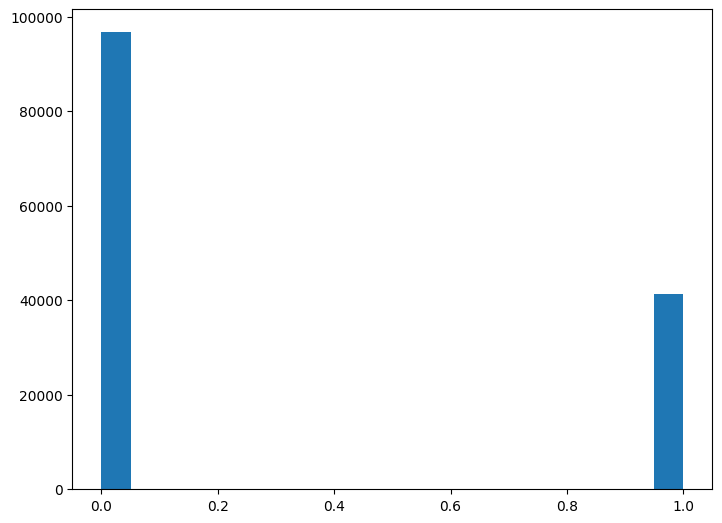

In [21]:
ax = plt.figure().add_axes([0,0,1,1])
ax.hist(df["legitimate"],20)
plt.show()

In [22]:
x = df.drop(["legitimate","Name","md5"], axis=1)
y = df["legitimate"]
x.head()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,332,224,258,9,0,361984,115712,0,6135,4096,...,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18
3,332,224,258,9,0,585728,369152,0,451258,4096,...,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18
4,332,224,258,9,0,294912,247296,0,217381,4096,...,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18


#Training


In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, y_train.shape

((110437, 54), (110437,))

In [24]:
from sklearn.metrics import f1_score, accuracy_score, auc, confusion_matrix, ConfusionMatrixDisplay

###1 - Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
m_rand = clf.fit(x_train, y_train)

In [26]:
m_rand_train_pred = m_rand.predict(x_train)
m_rand_pred = m_rand.predict(x_test)
accuracy_score(y_train, m_rand_train_pred), accuracy_score(y_test, m_rand_pred)

(0.9828318407780001, 0.9838102136906918)

In [27]:
f1_score(y_test, m_rand_pred)

0.9730933606212002

[[19080   170]
 [  277  8083]]


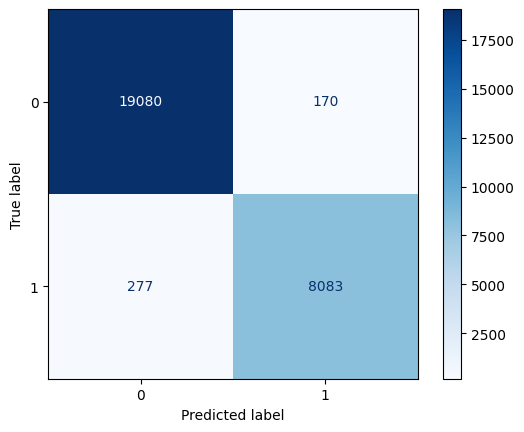

In [28]:
print(confusion_matrix(y_test, m_rand_pred))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=m_rand_pred,
                                        cmap=plt.cm.Blues);

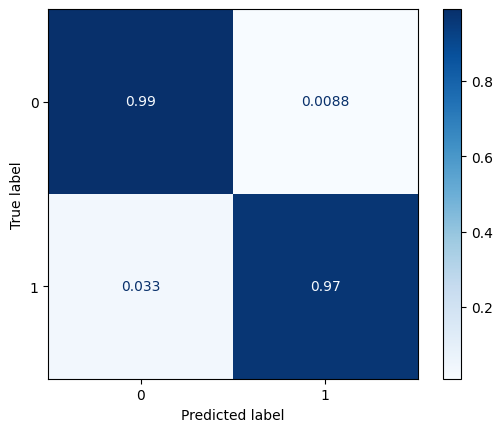

In [29]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=m_rand_pred,
                                        cmap=plt.cm.Blues,
                                        normalize='true');

#Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
m_log = clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
m_log_train_pred = m_log.predict(x_train)
m_log_pred = m_log.predict(x_test)
accuracy_score(y_train, m_log_train_pred), accuracy_score(y_test, m_log_pred)

(0.7015221347917817, 0.6972111553784861)

In [32]:
f1_score(y_test, m_log_pred)

0.0

[[19250     0]
 [ 8360     0]]


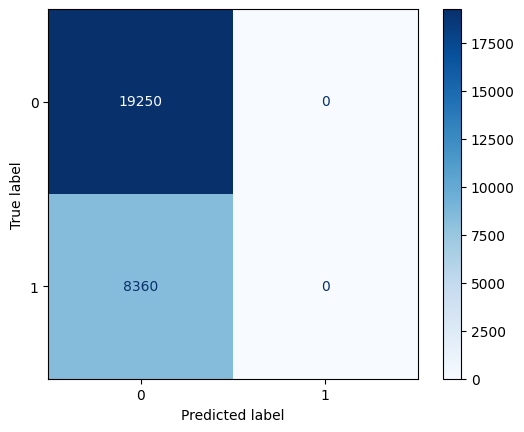

In [33]:
print(confusion_matrix(y_test, m_log_pred))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=m_log_pred,
                                        cmap=plt.cm.Blues);

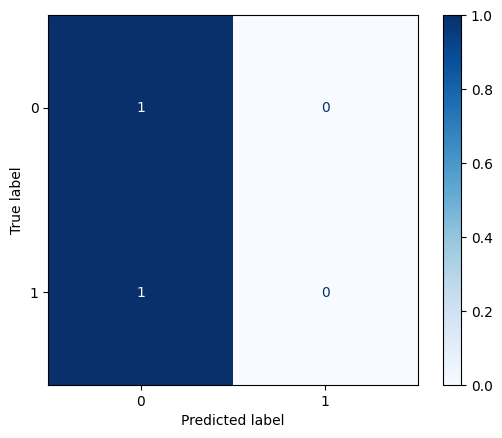

In [34]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=m_log_pred,
                                        cmap=plt.cm.Blues,
                                        normalize='true');

#Neural Network


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [38]:
model = Sequential()
model.add(Dense(16, input_dim=54, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [40]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [41]:
model.fit(x_train,y_train, epochs=5, batch_size=32)

Epoch 1/5
3452/3452 [==============================] - 10s 2ms/step - loss: 38185968.0000 - accuracy: 0.9530
Epoch 2/5
3452/3452 [==============================] - 7s 2ms/step - loss: 17386458.0000 - accuracy: 0.9491
Epoch 3/5
3452/3452 [==============================] - 8s 2ms/step - loss: 7931916.5000 - accuracy: 0.9436
Epoch 4/5
3452/3452 [==============================] - 7s 2ms/step - loss: 5701092.5000 - accuracy: 0.9461
Epoch 5/5
3452/3452 [==============================] - 21s 6ms/step - loss: 7714118.0000 - accuracy: 0.9433


In [44]:
m_nur_train_pred = model.predict(x_train)
m_nur_train_pred = [1 if y>=0.5 else 0 for y in m_nur_train_pred]
accuracy_score(y_train, m_nur_train_pred)

3452/3452 [==============================] - 8s 2ms/step


0.9302226608835806

In [45]:
m_nur_pred = model.predict(x_test)
m_nur_pred = [1 if y>=0.5 else 0 for y in m_nur_pred]
accuracy_score(y_test, m_nur_pred)

863/863 [==============================] - 2s 2ms/step


0.9318725099601594

In [49]:
f1_score(y_test, m_nur_pred)

0.874625074985003

[[19168    82]
 [ 1799  6561]]


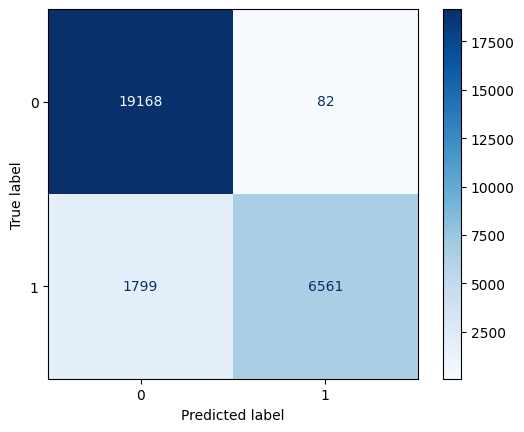

In [51]:
print(confusion_matrix(y_test, m_nur_pred))
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=m_nur_pred,
                                        cmap=plt.cm.Blues);

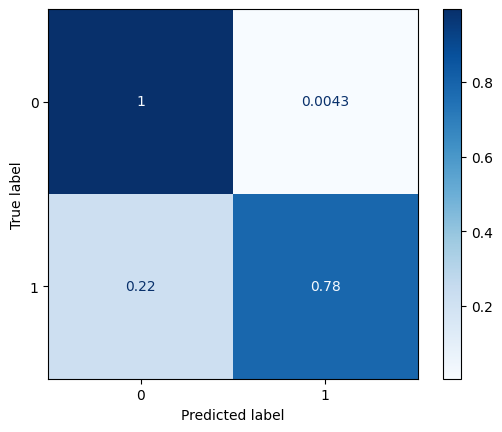

In [52]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=m_nur_pred,
                                        cmap=plt.cm.Blues,
                                        normalize='true');